# Protocolo BB84

#### Angel Alvarez. 16-10031

In [4]:
import numpy as np
import random
from qiskit import *
from qiskit.visualization import plot_histogram as plth

In [5]:
n = 10 #Tamaño de la muestra

In [6]:
# Paso 1a: Generación de los bits de Alice

alice_bits = random.choices(['1','0'], k=n)
print(''.join(alice_bits))

0000010101


In [7]:
# Paso 1b: Codificacion en las bases

alice_basis = random.choices(['Z','X'], k=n)
print(''.join(alice_basis))

XZZXXZXXZZ


In [8]:
# Paso 2: Bases de Bob

bob_basis = random.choices(['Z','X'], k=n)
print(''.join(bob_basis))

XXZXXXZZZZ


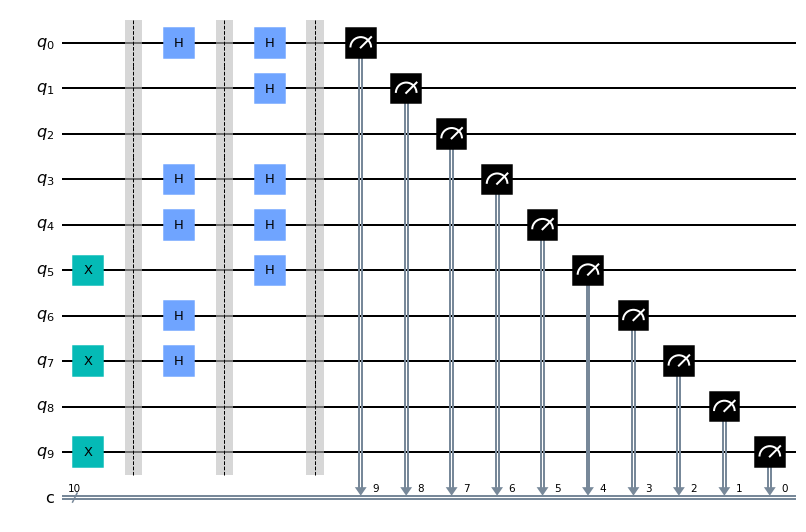

In [9]:
# Registros del circuito
qr = QuantumRegister(n, name ='q')
cr = ClassicalRegister(n, name='c')

# Circuito

circuit = QuantumCircuit(qr, cr)


# Bits de Alice

for q in range(n):
    if alice_bits[q] == '1':
        circuit.x(q)
        
circuit.barrier()
# Codificacion de Alice

for q in range(n):
    if alice_basis[q] == 'X':
        circuit.h(q)
        
circuit.barrier()

# Medidas de Bob

for q in range(n):
    if bob_basis[q] == 'X':
        circuit.h(q)
        
circuit.barrier()

for q in range(n):
    circuit.measure(q,n-1-q)


circuit.draw(output='mpl')

In [11]:
sim = Aer.get_backend('qasm_simulator')
results = execute(circuit, backend = sim, shots = 1248).result()
counts = results.get_counts()
bob_result = random.choice(list(counts.keys())) 
print(bob_result)

0100011001


In [12]:
# Paso 3: Comparacion de las bases

accepted_bits = []
locations = []

for q in range(n):
    if alice_basis[q] == bob_basis[q]:
        accepted_bits.append(bob_result[q])
        locations.append(q)
        
bob_bits = accepted_bits
print(''.join(bob_bits))

000001


In [13]:
# Paso 4: Seleccion de algunos bits para confirmar que son identicos entre Alice y Bob

random_bits = random.choices(locations, k=int(n*0.1))

verification = []

for q in random_bits:
     verification.append(alice_bits[q] == bob_result[q])
        
print(verification)
    

[True]


In [14]:
# Drop los elementos tomados

final_key = []

for q in locations:
    if q not in random_bits:
        final_key.append( bob_result[q] )

KEY = ''.join(final_key)
print(KEY)

00000


In [15]:
len(KEY)/n

0.5